In [4]:
# 数据读取及基本处理
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report  

from matplotlib.font_manager import FontProperties
# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

In [5]:
#加载数据集
data=pd.read_csv("D:\\AD\\老年+(1).csv")                                
#游览数据集
data.head()

,报告单元,样本日期,样本号,性别,年龄,科室,条码号,临床诊断,ALT,AST,...,IBIL,TP,ALB,GLOB,A/G,CHE,TBA,PA,5-NT,ADA
0,生化·综合项目,2024/06/02,53,女,58岁10月,老年精神科门诊,224060297300,广泛性焦虑障碍,25,17,...,11.9,72.0,47.1,24.9,1.9,NaN,NaN,NaN,NaN,NaN
1,生化·综合项目,2024/06/02,110,女,57岁,老年精神科住院,124060246421,:幻觉妄想状态,19,20,...,11.8,75.8,41.7,34.1,1.2,10187.0,8.9,293.0,6.6,13.9
2,生化·综合项目,2024/06/03,14,男,82岁9月,老年精神科住院,124060246211,":阿尔茨海默病冠状动脉粥样硬化性心脏病,陈旧性脑梗死,慢性支气管炎,2型糖尿病,原发性高血压...",21,22,...,5.4,84.6,33.2,51.4,0.6,NaN,NaN,NaN,NaN,NaN
3,生化·综合项目,2024/06/03,48,男,84岁2月,老年精神科住院,124060246157,":抑郁发作不伴有精神病性症状的重度抑郁发作,陈旧性脑梗死,高血压,不伴有精神病性症状的重度抑...",10,20,...,3.1,58.3,27.1,31.2,0.9,NaN,NaN,NaN,NaN,NaN
4,生化·综合项目,2024/06/03,207,女,35岁8月,老年精神科住院,124060347860,:酒精依赖综合征,16,31,...,4.1,73.7,44.7,29.0,1.5,NaN,NaN,NaN,NaN,NaN


In [6]:
# 查看数据总体概况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   报告单元    640 non-null    object 
 1   样本日期    640 non-null    object 
 2   样本号     640 non-null    int64  
 3   性别      640 non-null    object 
 4   年龄      640 non-null    object 
 5   科室      640 non-null    object 
 6   条码号     640 non-null    int64  
 7   临床诊断    640 non-null    object 
 8   ALT     640 non-null    int64  
 9   AST     640 non-null    int64  
 10  ALP     640 non-null    int64  
 11  GGT     640 non-null    int64  
 12  TBIL    640 non-null    float64
 13  DBIL    640 non-null    float64
 14  IBIL    640 non-null    float64
 15  TP      640 non-null    float64
 16  ALB     640 non-null    float64
 17  GLOB    640 non-null    float64
 18  A/G     640 non-null    float64
 19  CHE     381 non-null    float64
 20  TBA     381 non-null    float64
 21  PA      381 non-null    float64
 22  5-

In [7]:
#对数据值型特征，用常用统计量观察其分布
data.describe()

,样本号,条码号,ALT,AST,ALP,GGT,TBIL,DBIL,IBIL,TP,ALB,GLOB,A/G,CHE,TBA,PA,5-NT,ADA
count,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,1052.771875,1.495302e+11,23.398438,25.862500,109.217187,31.437500,10.440156,3.587969,6.852187,68.721094,39.090000,29.631094,1.348125,7593.732283,4.550656,225.763780,3.533333,12.025459
std,6117.364023,4.360265e+10,24.915990,45.128783,45.062725,42.597903,5.926292,2.315619,3.955717,6.280377,4.423627,4.608143,0.241013,1862.313333,9.078812,59.706844,5.747518,4.290462
min,2.000000,1.240529e+11,1.000000,7.000000,31.000000,5.000000,2.600000,0.500000,0.900000,50.200000,22.500000,19.500000,0.600000,60.000000,0.000000,60.000000,0.500000,4.600000
25%,709.750000,1.240612e+11,12.000000,16.000000,83.000000,13.000000,6.500000,2.300000,4.100000,64.275000,36.700000,26.300000,1.200000,6523.000000,1.600000,186.000000,2.100000,9.200000
50%,753.000000,1.240620e+11,16.500000,19.000000,101.000000,20.000000,9.100000,3.100000,6.000000,68.500000,39.200000,29.100000,1.400000,7463.000000,2.800000,223.000000,2.700000,11.300000
75%,789.000000,2.240602e+11,25.000000,25.000000,125.000000,32.000000,12.700000,4.200000,8.600000,73.050000,42.025000,32.300000,1.500000,8589.000000,5.300000,258.000000,3.600000,13.900000
max,90060.000000,2.240630e+11,334.000000,908.000000,559.000000,545.000000,62.300000,35.400000,39.800000,85.700000,53.900000,51.400000,2.000000,13090.000000,147.300000,420.000000,105.500000,40.300000


查看发现，在数据集中，CHE，TBA，PA，5-NT，ADA 这几个特征值均缺失了259个值。

对数据进行探索

In [8]:
#查看缺失值情况
data.isnull().sum() 

报告单元      0
样本日期      0
样本号       0
性别        0
年龄        0
科室        0
条码号       0
临床诊断      0
ALT       0
AST       0
ALP       0
GGT       0
TBIL      0
DBIL      0
IBIL      0
TP        0
ALB       0
GLOB      0
A/G       0
CHE     259
TBA     259
PA      259
5-NT    259
ADA     259
dtype: int64

In [9]:
#我们对缺失值进行填补
#采用贝叶斯对数据进行缺失值填补
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


df = pd.DataFrame(data)

# 选择要填补的特定特征列
features_to_impute = ['CHE', 'TBA', 'PA','5-NT','ADA']

# 创建 IterativeImputer 实例
# max_iter 是迭代次数，random_state 是随机状态，以确保结果的可重复性
imputer = IterativeImputer(max_iter=10, random_state=0)

# 只选择需要填补的特征进行拟合和转换
imputed_data = imputer.fit_transform(df[features_to_impute])

# 将填补后的数据赋值回原始 DataFrame 的对应列
df[features_to_impute] = imputed_data

# 打印填补后的数据
print(df)


        报告单元        样本日期  样本号 性别      年龄        科室           条码号  \
0    生化·综合项目  2024/06/02   53  女  58岁10月   老年精神科门诊  224060297300   
1    生化·综合项目  2024/06/02  110  女     57岁   老年精神科住院  124060246421   
2    生化·综合项目  2024/06/03   14  男   82岁9月   老年精神科住院  124060246211   
3    生化·综合项目  2024/06/03   48  男   84岁2月   老年精神科住院  124060246157   
4    生化·综合项目  2024/06/03  207  女   35岁8月   老年精神科住院  124060347860   
..       ...         ...  ... ..     ...       ...           ...   
635   生化·流水线  2024/06/30  747  女   32岁4月   老年精神科住院  124062976529   
636   生化·流水线  2024/06/30  752  男   67岁8月   老年精神科门诊  224063009669   
637   生化·流水线  2024/06/30  753  女   76岁1月  老年焦虑抑郁门诊  224063009664   
638   生化·流水线  2024/06/30  774  女   62岁2月  老年焦虑抑郁门诊  224063009805   
639   生化·流水线  2024/06/30  788  男     53岁   老年精神科门诊  224063009851   

                                                  临床诊断  ALT  AST  ...  IBIL  \
0                                              广泛性焦虑障碍   25   17  ...  11.9   
1                        

In [10]:
# 频率表，表示性别与临床诊断出阿尔茨海默病的值相应的数量关系
pd.crosstab(data['临床诊断'], data['性别'], rownames=['临床诊断'])

性别,女,男
临床诊断,,
:不伴有精神病性症状的重度抑郁发作,4,1
:不伴有精神病性症状的重度抑郁发作不伴有精神病性症状的重度抑郁发作,1,1
":不伴有精神病性症状的重度抑郁发作不伴有精神病性症状的重度抑郁发作,2型糖尿病,不伴有精神病性症状的重",1,0
":不伴有精神病性症状的重度抑郁发作不伴有精神病性症状的重度抑郁发作,不伴有精神病性症状的重度抑郁发作",1,0
":不伴有精神病性症状的重度抑郁发作不伴有精神病性症状的重度抑郁发作,不伴有精神病性症状的重度抑郁发作,",5,1
...,...,...
阿尔茨海默病,2,2
阿尔茨海默病(混合型),1,1
阿尔茨海默病性痴呆,4,3


<Figure size 640x480 with 0 Axes>

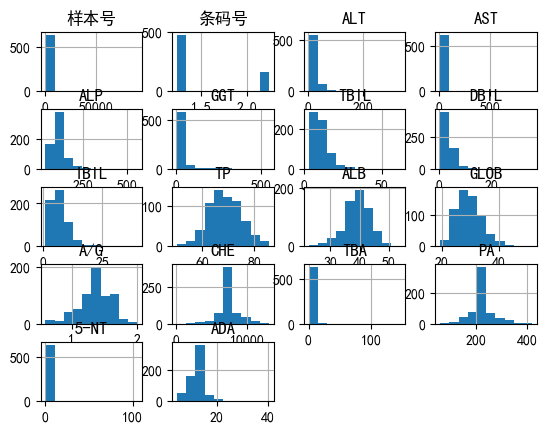

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_size = (10, 6)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# plot all of the columns
data.hist()
pl.show()

In [12]:
#对是否患阿尔兹海默病的患者进行编码
# 创建DataFrame
df = pd.DataFrame(data)

# 创建一个只表示是否患有阿尔兹海默症的虚拟变量
df['阿尔兹海默病'] = df['临床诊断'].apply(lambda x: 1 if '阿尔茨海默病'in x else 0)

# 打印更新后的DataFrame
print(df)

        报告单元        样本日期  样本号 性别      年龄        科室           条码号  \
0    生化·综合项目  2024/06/02   53  女  58岁10月   老年精神科门诊  224060297300   
1    生化·综合项目  2024/06/02  110  女     57岁   老年精神科住院  124060246421   
2    生化·综合项目  2024/06/03   14  男   82岁9月   老年精神科住院  124060246211   
3    生化·综合项目  2024/06/03   48  男   84岁2月   老年精神科住院  124060246157   
4    生化·综合项目  2024/06/03  207  女   35岁8月   老年精神科住院  124060347860   
..       ...         ...  ... ..     ...       ...           ...   
635   生化·流水线  2024/06/30  747  女   32岁4月   老年精神科住院  124062976529   
636   生化·流水线  2024/06/30  752  男   67岁8月   老年精神科门诊  224063009669   
637   生化·流水线  2024/06/30  753  女   76岁1月  老年焦虑抑郁门诊  224063009664   
638   生化·流水线  2024/06/30  774  女   62岁2月  老年焦虑抑郁门诊  224063009805   
639   生化·流水线  2024/06/30  788  男     53岁   老年精神科门诊  224063009851   

                                                  临床诊断  ALT  AST  ...    TP  \
0                                              广泛性焦虑障碍   25   17  ...  72.0   
1                        

In [13]:
# 对性别进行独热编码
gender_encoded = pd.get_dummies(df['性别'], prefix='性别')

# 将独热编码的结果添加到df中，并删除原来的'性别'列
df = pd.concat([df.drop('性别', axis=1), gender_encoded], axis=1)

# 再次打印列名以确认独热编码的列已经添加
print("更新后的列名:", df.columns)

更新后的列名: Index(['报告单元', '样本日期', '样本号', '年龄', '科室', '条码号', '临床诊断', 'ALT', 'AST', 'ALP',
       'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA',
       'PA', '5-NT', 'ADA', '阿尔兹海默病', '性别_女', '性别_男'],
      dtype='object')


In [14]:
#对年龄进行转换
def convert_age(age_str):
    if pd.isnull(age_str) or age_str.strip() == '':
        return None  # 返回 None 或者可以选择返回 0 或其他默认值
    try:
        age_str = age_str.strip()  # 移除可能的首尾空格
        parts = age_str.split('岁')
        years = int(parts[0])
        
        # 检查是否有月份信息，并且非空
        if len(parts) > 1 and parts[1].strip():
            months_part = parts[1].split('月')[0].strip()
            if months_part.isdigit():  # 确保月份部分是数字
                months = int(months_part)
            else:
                raise ValueError("月份部分不是有效的数字")
        else:
            months = 0  # 没有月份信息，默认为0

        return years + (months / 12.0)
    except (ValueError, IndexError) as e:
        # 打印错误信息，可以选择记录日志或进行其他错误处理
        print(f"转换年龄时发生错误: {e}")
        return None  # 或者返回适当的默认值
    
# 应用转换函数
df['年龄'] = df['年龄'].apply(convert_age)
print(df)

        报告单元        样本日期  样本号         年龄        科室           条码号  \
0    生化·综合项目  2024/06/02   53  58.833333   老年精神科门诊  224060297300   
1    生化·综合项目  2024/06/02  110  57.000000   老年精神科住院  124060246421   
2    生化·综合项目  2024/06/03   14  82.750000   老年精神科住院  124060246211   
3    生化·综合项目  2024/06/03   48  84.166667   老年精神科住院  124060246157   
4    生化·综合项目  2024/06/03  207  35.666667   老年精神科住院  124060347860   
..       ...         ...  ...        ...       ...           ...   
635   生化·流水线  2024/06/30  747  32.333333   老年精神科住院  124062976529   
636   生化·流水线  2024/06/30  752  67.666667   老年精神科门诊  224063009669   
637   生化·流水线  2024/06/30  753  76.083333  老年焦虑抑郁门诊  224063009664   
638   生化·流水线  2024/06/30  774  62.166667  老年焦虑抑郁门诊  224063009805   
639   生化·流水线  2024/06/30  788  53.000000   老年精神科门诊  224063009851   

                                                  临床诊断  ALT  AST  ALP  ...  \
0                                              广泛性焦虑障碍   25   17  105  ...   
1                          

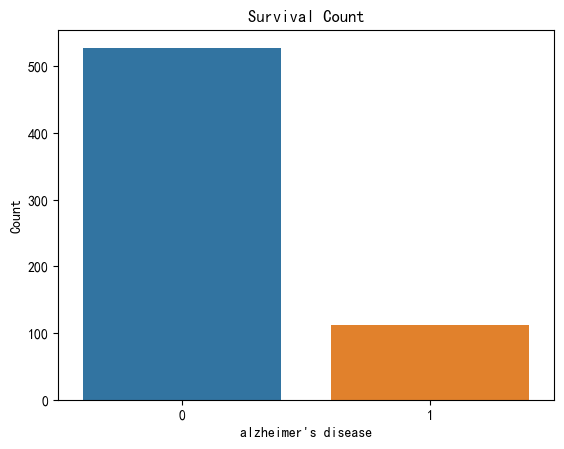

In [15]:
# 1.绘制患者条形图
sns.countplot(data=data, x="阿尔兹海默病")
plt.xlabel("alzheimer's disease")
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()

In [16]:
#2.对性别分组并计数
data.groupby(['性别','阿尔兹海默病'])['阿尔兹海默病'].count()

性别  阿尔兹海默病
女   0         386
    1          70
男   0         142
    1          42
Name: 阿尔兹海默病, dtype: int64

In [17]:
total_female = 386 + 70
total_male = 142 + 42

rate_female = (70 / total_female) * 100
rate_male = (42 / total_male) * 100

print(f"女性患病率: {rate_female:.2f}%")
print(f"男性患病率: {rate_male:.2f}%")

女性患病率: 15.35%
男性患病率: 22.83%


我们发现，患阿尔兹海默病的患者中女性患病率略高于男性。并且比男性明显高出7.48%

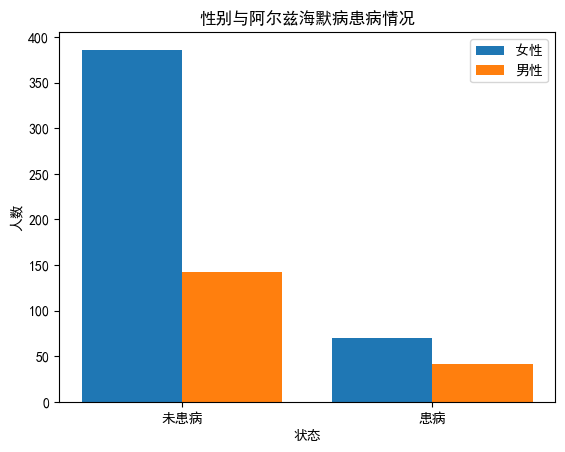

In [18]:
# 为条形图准备数据
female = [386, 70]
male = [142, 42]
labels = ['未患病', '患病']
genders = ['女性', '男性']

x = range(len(labels))

# 绘制条形图
plt.bar(x, female, width=0.4, label='女性')
plt.bar([i + 0.4 for i in x], male, width=0.4, label='男性')

# 添加标签和标题
plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel('状态')
plt.ylabel('人数')
plt.title('性别与阿尔兹海默病患病情况')

# 显示图例
plt.legend()

# 显示图形
plt.show()

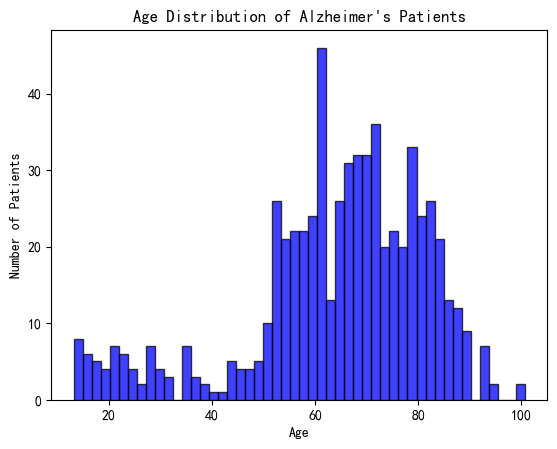

In [19]:
#3.探究年龄与患病之间的关系
ages = df['年龄']

# 绘制直方图
plt.hist(ages, bins=50, alpha=0.75, color='blue', edgecolor='black')

# 添加标题和标签
plt.title('Age Distribution of Alzheimer\'s Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# 显示图形
plt.show()

我们发现，患者的年龄集中在50-85岁这个区间，并且我们发现在60岁会出现一个大爆发，表示在60岁这个年龄是发病的高峰期。

In [20]:
#删除无用的特征
df.drop(['报告单元','样本日期','科室','条码号','临床诊断'],axis=1,inplace=True)

In [21]:
print(df.head(10))

   样本号         年龄  ALT  AST  ALP  GGT  TBIL  DBIL  IBIL    TP  ...  GLOB  A/G  \
0   53  58.833333   25   17  105   19  17.9   6.0  11.9  72.0  ...  24.9  1.9   
1  110  57.000000   19   20  136   38  15.4   3.6  11.8  75.8  ...  34.1  1.2   
2   14  82.750000   21   22  129   28   8.3   2.9   5.4  84.6  ...  51.4  0.6   
3   48  84.166667   10   20  104   25   5.6   2.5   3.1  58.3  ...  31.2  0.9   
4  207  35.666667   16   31   80   23   5.9   1.8   4.1  73.7  ...  29.0  1.5   
5   15  17.833333   14   16   61    8   6.4   2.2   4.2  59.6  ...  24.8  1.4   
6   36  50.750000   34   35   74   24  10.7   4.0   6.7  73.3  ...  30.2  1.4   
7   72  60.083333   25   39  209   55  10.7   3.3   7.4  67.4  ...  27.0  1.5   
8   75  51.666667   19   20   87   27  10.2   1.2   9.0  72.5  ...  26.5  1.7   
9  149  61.333333   22   31  145   20  20.2   7.6  12.6  70.6  ...  28.1  1.5   

            CHE       TBA         PA      5-NT        ADA  阿尔兹海默病  性别_女  性别_男  
0   7593.732283  4.550656  2

特征选择
y = df['阿尔兹海默病']   
X = df[[ '年龄','ALT', 'AST',
       'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE',
       'TBA', 'PA', '5-NT', 'ADA','性别_女', '性别_男']]

X中包含了年龄、ALT（丙氨酸转氨酶）、AST（天门冬氨酸转氨酶）、ALP（碱性磷酸酶）、GGT（γ-谷氨酰转肽酶）、TBIL（总胆红素）、DBIL（直接胆红素）、IBIL（间接胆红素）、TP（总蛋白）、ALB（白蛋白）、GLOB（球蛋白）、A/G（白球比例）、CHE（胆碱酯酶）、TBA（总胆汁酸）、PA（前白蛋白）、5-NT（5'-核苷酸酶）、ADA（腺苷脱氨酸）、性别（虚拟变量）

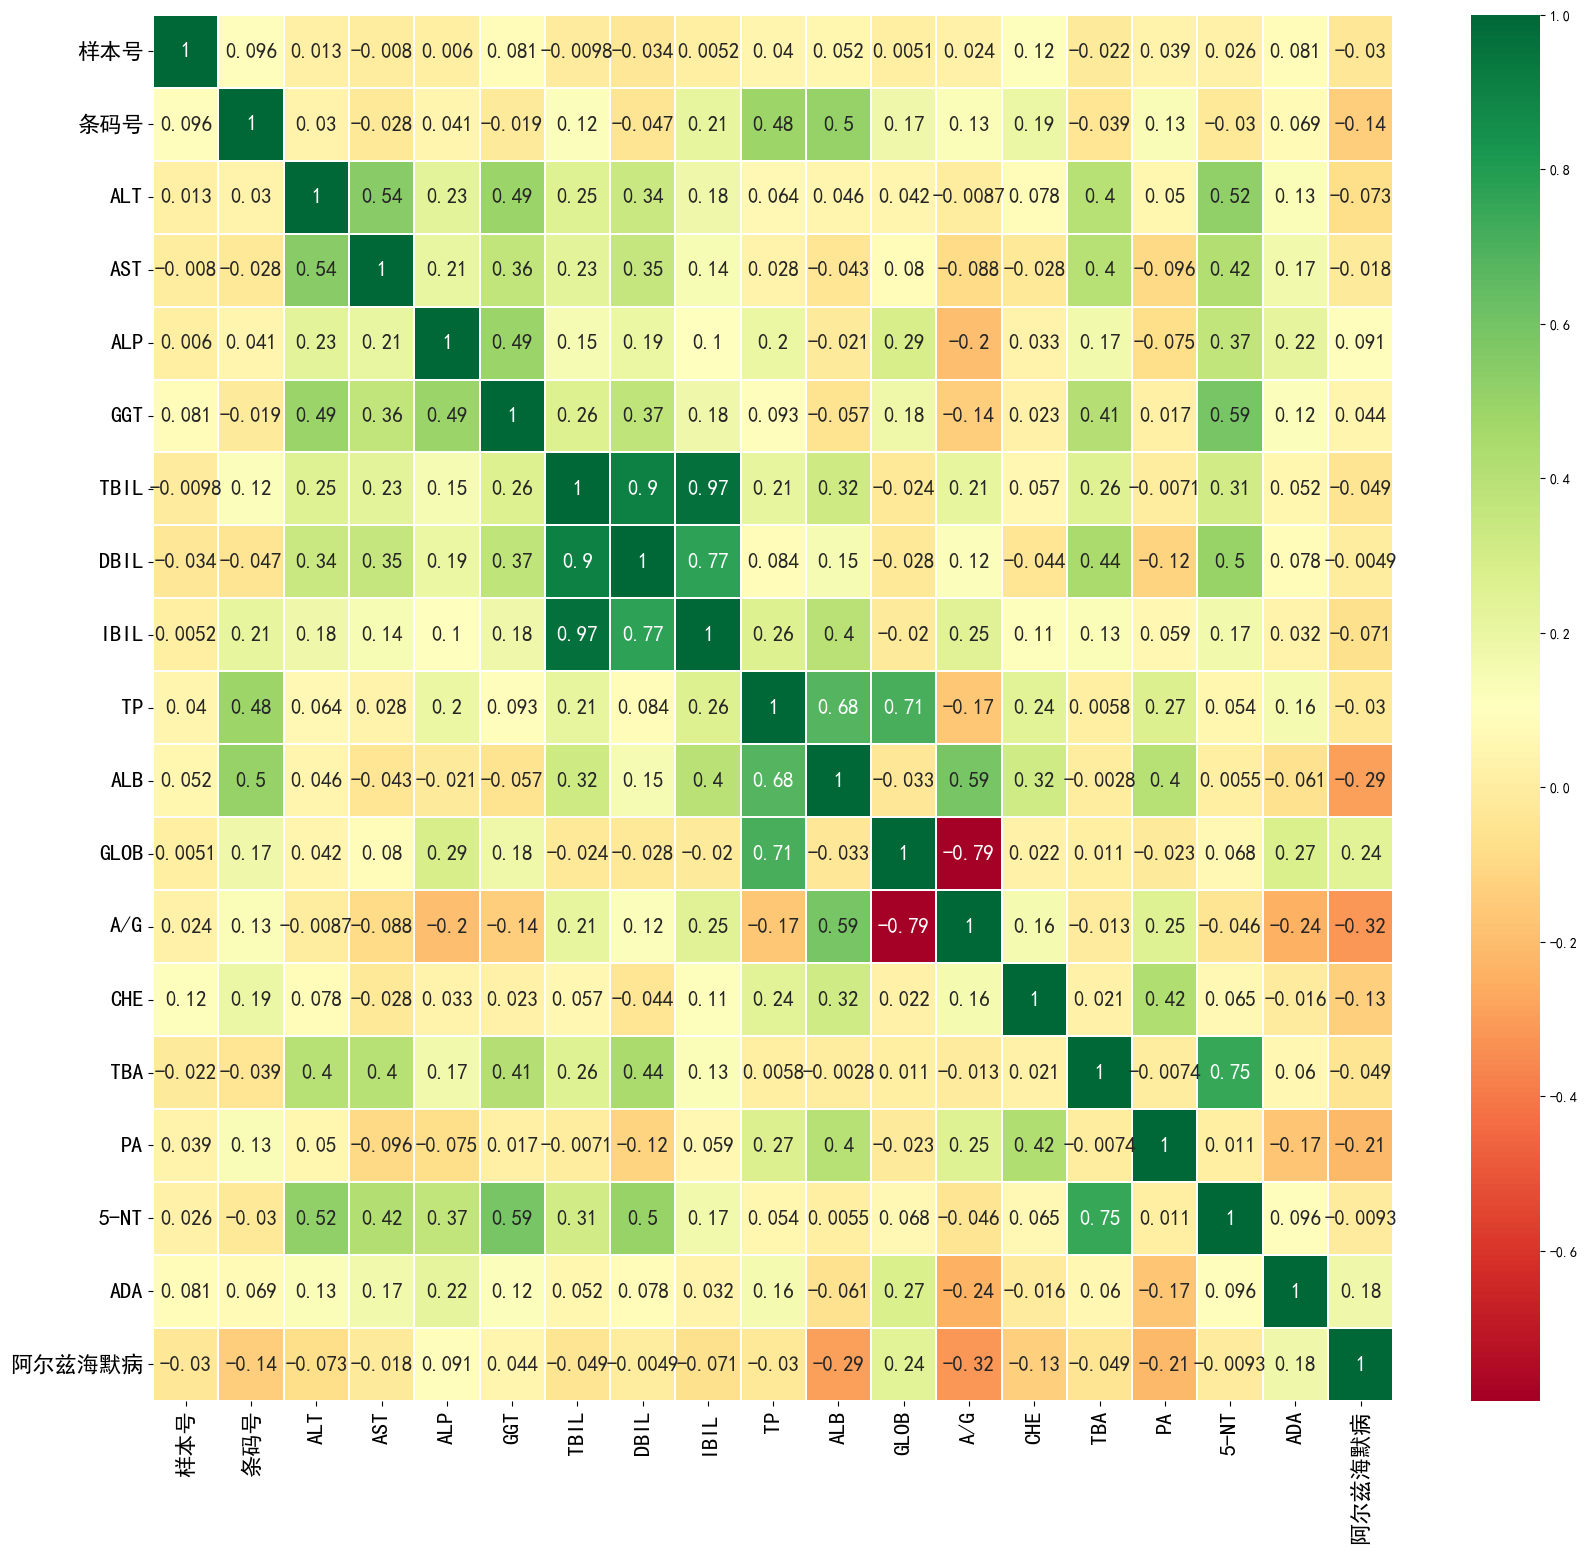

In [34]:
#查看特征之间的相关性
# 计算DataFrame的相关系数矩阵，显式指定numeric_only为True
correlation_matrix = data.corr(numeric_only=True)

# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
# 显示图形
plt.show()

In [51]:
# 特征选择  
y = df['阿尔兹海默病']  
X = df[['年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL',   
         'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA', 'PA', '5-NT',   
         'ADA', '性别_女', '性别_男']]  

# 拆分数据集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 只对训练集添加常数项
X_train = sm.add_constant(X_train)

# 拟合逻辑回归模型
logit = sm.Logit(y_train, X_train)
result = logit.fit(maxiter=500)

# 获取特征的系数（权重）
feature_weights = result.params[1:]  # 排除常数项的系数

# 打印特征名称及其对应的权重
feature_names = X_train.columns[1:]  # 排除常数项的列名
print("Feature Weights:")
for name, weight in zip(feature_names, feature_weights):
    print(f"Feature: {name}, Weight: {weight:.3f}")

# 计算比值比
odds_ratios = np.exp(result.params[1:])  # 排除常数项，计算特征的比值比

# 打印特征名称及其对应的比值比
print("Odds Ratios:")
for name, ratio in zip(feature_names, odds_ratios):
    print(f"Feature: {name}, Odds Ratio: {ratio:.3f}")

# 进行预测，并将预测评分存入预测集的对应列中
X_test = sm.add_constant(X_test)  # 添加常数项
y_test_pred = result.predict(X_test)  # 使用拟合的模型进行预测

# 生成预测标签
threshold = 0.5
predicted_classes = (y_test_pred > threshold).astype(int)

# 输出分类报告
print(classification_report(y_test, predicted_classes, target_names=['未患病', '患阿尔兹海默病']))

# 计算准确率
accuracy = (predicted_classes == y_test).mean()
print('Accuracy: %.2f' % accuracy)

         Current function value: 0.287313
         Iterations: 500
Feature Weights:
Feature: 年龄, Weight: 0.168
Feature: ALT, Weight: -0.002
Feature: AST, Weight: -0.002
Feature: ALP, Weight: -0.005
Feature: GGT, Weight: 0.002
Feature: TBIL, Weight: -0.031
Feature: DBIL, Weight: -0.113
Feature: IBIL, Weight: 0.083
Feature: TP, Weight: 0.039
Feature: ALB, Weight: -0.164
Feature: GLOB, Weight: 0.203
Feature: A/G, Weight: 4.317
Feature: CHE, Weight: 0.000
Feature: TBA, Weight: -0.127
Feature: PA, Weight: -0.005
Feature: 5-NT, Weight: -0.301
Feature: ADA, Weight: 0.044
Feature: 性别_女, Weight: -6.831
Feature: 性别_男, Weight: -6.447
Odds Ratios:
Feature: 年龄, Odds Ratio: 1.183
Feature: ALT, Odds Ratio: 0.998
Feature: AST, Odds Ratio: 0.998
Feature: ALP, Odds Ratio: 0.995
Feature: GGT, Odds Ratio: 1.002
Feature: TBIL, Odds Ratio: 0.970
Feature: DBIL, Odds Ratio: 0.893
Feature: IBIL, Odds Ratio: 1.086
Feature: TP, Odds Ratio: 1.040
Feature: ALB, Odds Ratio: 0.849
Feature: GLOB, Odds Ratio: 1.225
Fe

D:\lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


未患病分类的指标：
精确率（Precision）：0.91
召回率（Recall）：0.95
F1分数：0.93
样本数：110

患阿尔茨海默病分类的指标：
精确率：0.57
召回率：0.44
F1分数：0.50
样本数：18

整体准确率（Accuracy）：0.88，表示模型在所有测试样本中，正确分类的比例。

宏平均（macro avg）：
精确率：0.74
召回率：0.69
F1分数：0.71
样本数：128

加权平均（weighted avg）：
精确率：0.86
召回率：0.88
F1分数：0.87
样本数：128
这些指标反映了模型在识别两类样本中的表现。整体来看，模型对未患病者的识别效果较好，但对患病者的辨识能力较弱。

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 阿尔兹海默病   No. Observations:                  128
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                           18
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.4692
Time:                        20:29:35   Log-Likelihood:                -27.593
converged:                      False   LL-Null:                       -51.980
Covariance Type:            nonrobust   LLR p-value:                 0.0001154
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8097        nan        nan        nan         nan         nan
年龄             0.1964      0.158      1.244      0.213      -0.113       0.506
ALT           -0.0253      0.071     -0.357      0.721      -0.164       0.113
AST           -0.0499      0.092     -0.541      0.589      -0.231       0.131
ALP           -0.0121      0.012     -0.988      0.323      -0.036       0.012
GGT            0.0171      0.019      0.922      0.357      -0.019       0.053
TBIL          -0.0556   8.86e+05  -6.27e-08      1.000   -1.74e+06    1.74e+06
DBIL          -0.2154   8.87e+05  -2.43e-07      1.000   -1.74e+06    1.74e+06
IBIL           0.1598   8.87e+05    1.8e-07      1.000   -1.74e+06    1.74e+06
TP             0.0271   2.18e+05   1.24e-07      1.000   -4.27e+05    4.27e+05
ALB           -0.5450   2.18e+05   -2.5e-06      1.000   -4.27e+05    4.27e+05
GLOB           0.5721   2.18e+05   2.62e-06      1.000   -4.27e+05    4.27e+05
A/G           10.6817      7.734      1.381      0.167      -4.476      25.839
CHE            0.0001      0.000      0.248      0.804      -0.001       0.001
TBA           -0.5297      0.309     -1.716      0.086      -1.135       0.075
PA            -0.0057      0.011     -0.535      0.593      -0.027       0.015
5-NT           0.2825      0.409      0.691      0.490      -0.519       1.084
ADA            0.0197      0.107      0.185      0.854      -0.189       0.228
性别_女          -8.1159        nan        nan        nan         nan         nan
性别_男          -7.6938        nan        nan        nan         nan         nan
predict       -2.8742      5.684     -0.506      0.613     -14.014       8.265
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [26]:
result.conf_int()

,0,1
const,NaN,NaN
年龄,-1.130067e-01,5.058898e-01
ALT,-1.637678e-01,1.132510e-01
AST,-2.308972e-01,1.310079e-01
ALP,-3.619394e-02,1.193401e-02
GGT,-1.920814e-02,5.333257e-02
TBIL,-1.735739e+06,1.735739e+06
DBIL,-1.738637e+06,1.738637e+06
IBIL,-1.739375e+06,1.739375e+06
TP,-4.274047e+05,4.274047e+05


In [27]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                 2.5%         97.5%            OR
const             NaN           NaN  1.361252e-07
年龄       8.931446e-01  1.658461e+00  1.217064e+00
ALT      8.489391e-01  1.119913e+00  9.750579e-01
AST      7.938211e-01  1.139977e+00  9.512821e-01
ALP      9.644532e-01  1.012006e+00  9.879433e-01
GGT      9.809752e-01  1.054780e+00  1.017209e+00
TBIL     0.000000e+00           inf  9.459579e-01
DBIL     0.000000e+00           inf  8.061891e-01
IBIL     0.000000e+00           inf  1.173322e+00
TP       0.000000e+00           inf  1.027506e+00
ALB      0.000000e+00           inf  5.798275e-01
GLOB     0.000000e+00           inf  1.771924e+00
A/G      1.138090e-02  1.666494e+11  4.355020e+04
CHE      9.992856e-01  1.000922e+00  1.000104e+00
TBA      3.214792e-01  1.078348e+00  5.887839e-01
PA       9.737951e-01  1.015290e+00  9.943261e-01
5-NT     5.950907e-01  2.956467e+00  1.326411e+00
ADA      8.276486e-01  1.256708e+00  1.019859e+00
性别_女              NaN           NaN  2.987505e-04


D:\lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
